<center> <h1> <b> Speech Systems (EE6307) </b> </h1> </center>

<b> Programming Assignment - 04 - Gaussian Mixture Models (GMM) </b>

Welcome to the fourth programming assignment in the speech systems (EE6307) course. The current programming assignment is a prerequisite for building the Automatic Speaker Verification (ASV) with GMM-UBM models. This programming assignment is framed to understand the Gaussian Mixture Models (GMM). This task expects you to code an algorithm to build the GMM models on synthetic data in low dimensional space (2D space). Later, we can extend the framework to speech data in high dimensional space for building the ASV system. In the first part of the programming assignment, you need to generate the synthetic data in 2D space following the multi-modal distribution using Gaussians. In the second part, you need to code the Expectation-Maximization (EM) algorithm from scratch to estimate the parameters of the GMM model for the synthetic data. 



<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.





<h4> <b> Part1 (Generating synthetic data) : </b>  This section describes the steps involved in generating the synthetic data.   </h4>

<dt> <h4> 1. Generating synthetic data - Let us consider the GMM with Bivariate Gaussians  </h4> </dt> 
<dd> <h4> - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this assignment.   </h4> </dd> 
<br>
<dt> <h4> <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>  </h4> </dd> 
<br>
<dt> <h4> <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center> </h4> </dd>
<br>
<dt> <h4> <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center> </h4> </dd>
<br>
<dt> <h4> <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center> </h4> </dd>

<dd> <h4> - Pick one Gaussian following the selection probability as  $\pi$   </h4> </dd> 
<dd> <h4> - Sample the data point from the selected Bivariate Gaussian distribution   </h4> </dd>
<dd> <h4> - Repeat the process N times to get the entire data set </h4> </dd>
<dt> <h4> 2.Create the synthetic data set with the number of mixtures as 2. </h4> </dt> 
<dt> <h4> 3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt>
</h5> </dd> 


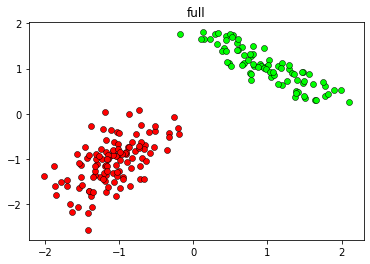

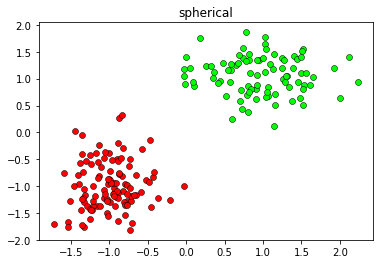

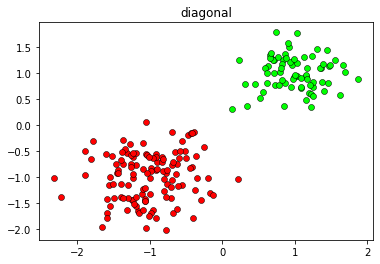

In [97]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

def generateData(pi, mus, sigmas, N, gaussianNum = 2):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points 
    #Steps
    #1.Select th Gaussian following the probability distribution as pi 
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions
    choices = np.linspace(0, 1, gaussianNum)
    dataset = {"samples" : [], "gaussianNumber": []}
    for i in range(N):
      g = int(rand.choices(choices, weights=pi)[0])
      dataset["samples"].append(np.random.multivariate_normal(mus[g], sigmas[g], size=1).reshape(-1).tolist())
      dataset["gaussianNumber"].append(g)
    dataset["samples"] = np.array(dataset["samples"])
    dataset["gaussianNumber"] = np.array(dataset["gaussianNumber"])
    return dataset
    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights 
############################################################################
pi = [ 0.6, 0.4]

mu1 = [-1.0, -1.0]
mu2 = [ 1.0, 1.0]
mus = [mu1, mu2]

sig1 = [ [ 0.1, 0.0], [ 0.0, 0.2] ]
sig2 = [ [ 0.2, 0.0], [ 0.0,  0.1] ]
sSigmas = [sig1, sig2]

sig1 = [ [ 0.15, 0.1], [ 0.1, 0.25] ]
sig2 = [ [ 0.3, -0.25], [ -0.25,  0.25] ]
fSigmas = [sig1, sig2]

sig1 = [ [ 0.2, 0.0], [ 0.0, 0.2] ]
sig2 = [ [ 0.1, 0.0], [ 0.0,  0.1] ]
dSigmas = [sig1, sig2]

covs = [{"name": "full", "sigma" : fSigmas}, {"name": "spherical", "sigma" : sSigmas}, {"name": "diagonal", "sigma" : dSigmas}]
n_points = 200

for i in range(len(covs)):
  dataset = generateData(pi, mus, covs[i]["sigma"], n_points)
  if covs[i]["name"] == "full":
    fData = dataset
  elif covs[i]["name"] == "spherical":
    sData = dataset
  else:
    dData = dataset
  ############################################################################
  #Create the synthetic data set
  ############################################################################

  g0 = np.array([dataset["samples"][i] for i in np.argwhere(dataset["gaussianNumber"]==0).reshape(-1)])
  g1 = np.array([dataset["samples"][i] for i in np.argwhere(dataset["gaussianNumber"]==1).reshape(-1)])
  ############################################################################
  #Plot the synthetic data set
  ############################################################################
  plt.plot(g0[:,0],g0[:,1], 'o', c='red', markeredgewidth = 0.5, markeredgecolor = 'black')
  plt.plot(g1[:,0],g1[:,1], 'o', c='lime', markeredgewidth = 0.5, markeredgecolor = 'black')
  plt.title(covs[i]["name"])
  plt.show()

<h4> <b> Part2 (EM algorithm) : </b> This section focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM).   </h4>

<dt> <h4> <b> Implementation of Expectation and Maximization (EM) algorithm
 </b> </h4> </dt> 
<dt> <h4> 1. Chose the number of mixtures (M) and initialize the parameters of GMM model </h4> </dt> 
<dd> <h4> - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability. </h4> </dd> 

<dt> <h4>  2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM </h4> </dt> 
<br>
<dd> <h4> <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center> </h4> </dd> 
<br>
<dt> <h4>  Where N is the total number of data points and M is the total number of Gaussians in GMM  </h4> </dt> 

<dt> <h4>  - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point  </h4> </dt> 

<dt> <h4>  - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian  </h4> </dt> 


<dt> <h4>  3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood.</h4> </dt>

<dt> <h4>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
</h4> </dt>

<dt> <h4>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
</h4> </dt>

<dt> <h4>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
</h4> </dt>

<dt> <h4>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
</h4> </dt>
<dt> <h4> 4. Compute the log-likelihood with the updated parameters </h4> </dt>
<dt> <h4>  5. Repeat the expectation and maximization steps untill convergence </h4> </dt>

<dt> <h4> <b> Illustration of EM iterations </b> </h4> </dt> 

<dt> <h4>  5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points. </h4> </dt>

<dt> <h4> <b> Understanding the issues with EM algorithm </b> </h4> </dt> 
<dt> <h4>  6. Check the influence of initialization on the convergence of the EM algorithm and fit quality. </h4> </dt>
<dd> <h4>  - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section   </h4> </dd>
<dt> <h4>  6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </h4> </dt>
<dd> <h4>  - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </h4> </dd>
<dd> <h4>  - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section   </h4> </dd>

In [91]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

X = dataset["samples"]
epsilon = 1e-6*np.identity(len(X[0]))

def initialization(X, M):
  mus = np.random.randint(min(X[:,0]),max(X[:,0]),size=(M,len(X[0])))
  covs = np.zeros((M,len(X[0]),len(X[0])))
  for dim in range(len(covs)):
      np.fill_diagonal(covs[dim],1)
  pi = np.ones(M)/M
  theta = {"mus" : mus, "covs" : covs, "pi" : pi}
  return theta

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################

def logLikelihood(X, theta, M = 2):
  pi =  theta["pi"]
  mus =  theta["mus"]
  covs =  theta["covs"]
  J = np.log(np.sum([k*multivariate_normal(mus[i],covs[j]).pdf(X) for k,i,j in zip(pi,range(len(mus)),range(len(covs)))]))
  return J

############################################################################
#Write a function for the expectation step 
############################################################################

def expectation(X, theta):
  pi =  theta["pi"]
  mus =  theta["mus"]
  covs =  theta["covs"]
  responsibilty = np.zeros((len(X),len(covs)))

  for m,co,p,r in zip(mus, covs, pi,range(len(responsibilty[0]))):
    co+=1e-6*np.identity(len(X[0]))
    mn = multivariate_normal(mean=m,cov=co)
    responsibilty[:,r] = p*mn.pdf(X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(pi,mus,covs+epsilon)],axis=0)

  return responsibilty

############################################################################
#Write a function for the maximization step. 
############################################################################

def maximization(X, theta, responsibility):
  mus = []
  covs = []
  pi = []

  for c in range(len(responsibility[0])):
    Nk = np.sum(responsibility[:,c],axis=0)
    mu_new = (1/Nk)*np.sum(X*responsibility[:,c].reshape(len(X),1),axis=0)
    mus.append(mu_new)
    sigma_k = ((1/Nk)*np.dot((np.array(responsibility[:,c]).reshape(len(X),1)*(X-mu_new)).T,(X-mu_new)))+epsilon
    covs.append(sigma_k)
    pi.append(Nk/np.sum(responsibility))

  theta = {"mus" : np.array(mus), "covs" : np.array(covs), "pi" : np.array(pi)}
  return theta

############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################

def EMalgo(X, theta, iters = 30):
  

  logLikelihoods = np.zeros(iters)
  thetas = []
  for i in range(iters):
    res = expectation(X, theta)
    theta = maximization(X, theta, res)
    thetas.append(theta)
    logLikelihoods[i] = logLikelihood(X, theta)
  return thetas, logLikelihoods

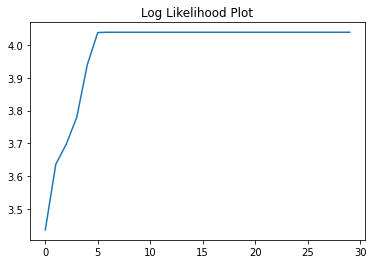

In [98]:
theta = initialization(X, 2)
thetas, logLikelihoods = EMalgo(X, theta, 30)

plt.plot(logLikelihoods)
plt.title("Log Likelihood Plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


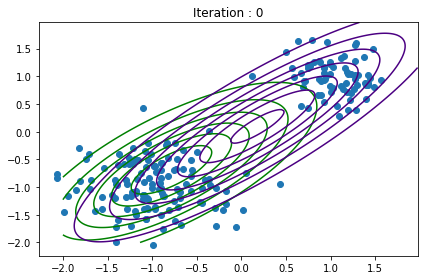

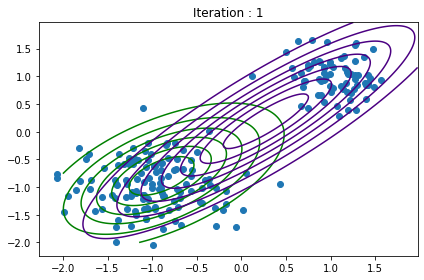

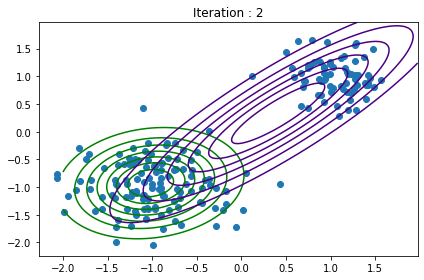

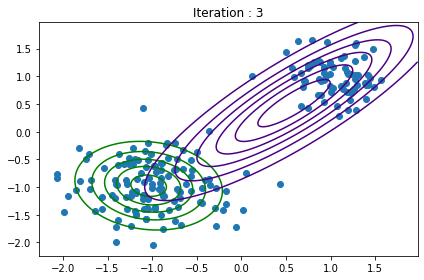

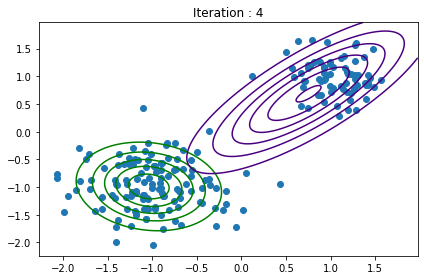

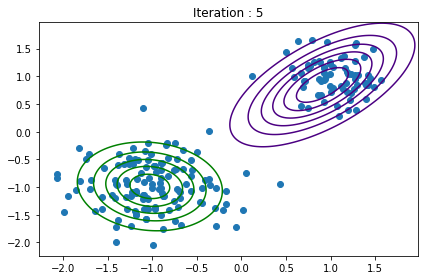

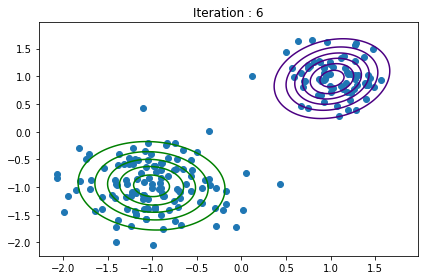

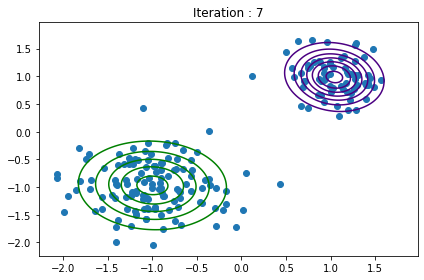

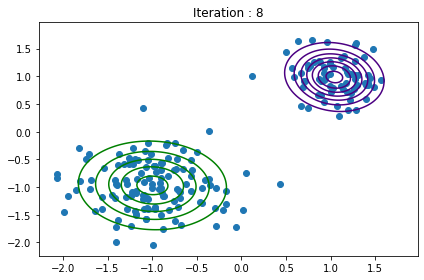

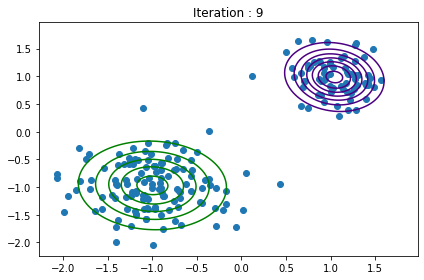

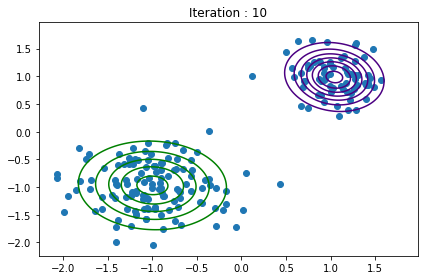

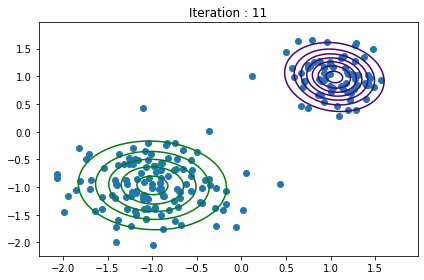

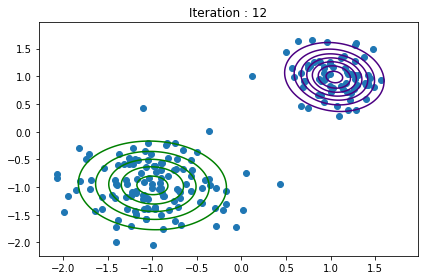

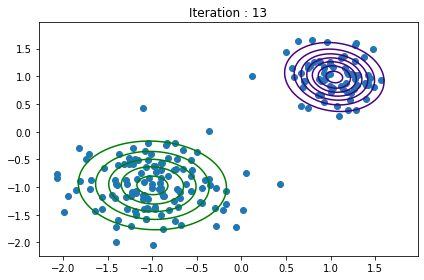

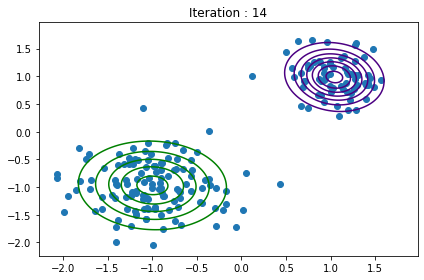

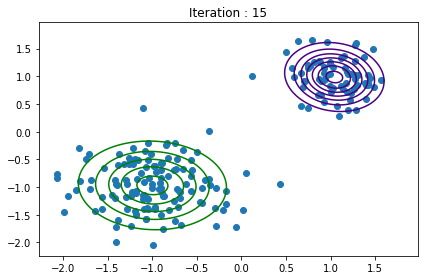

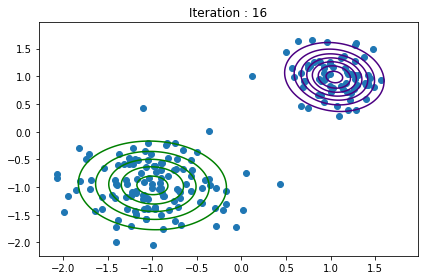

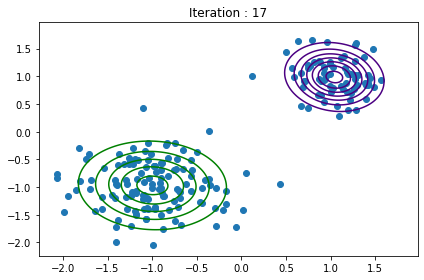

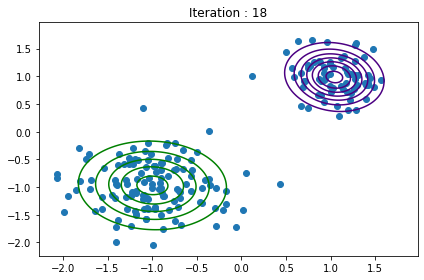

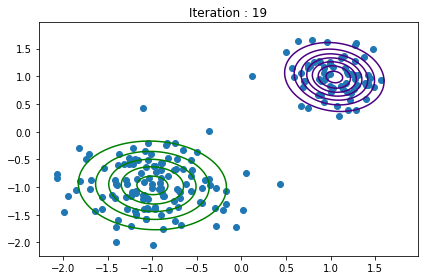

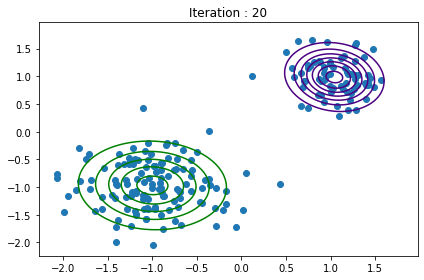

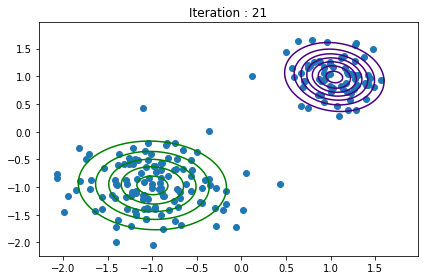

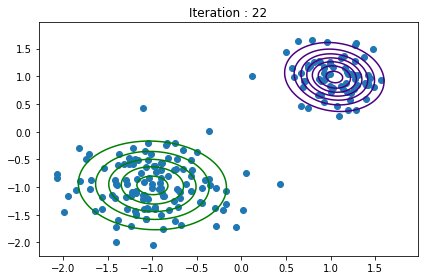

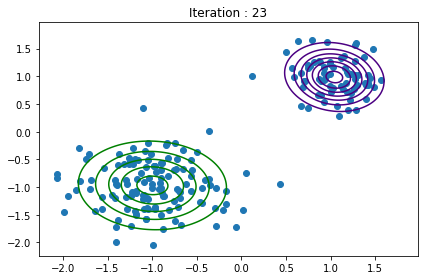

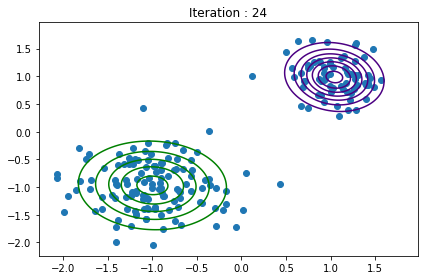

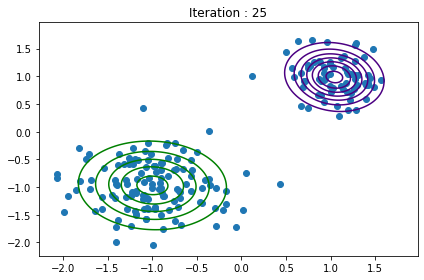

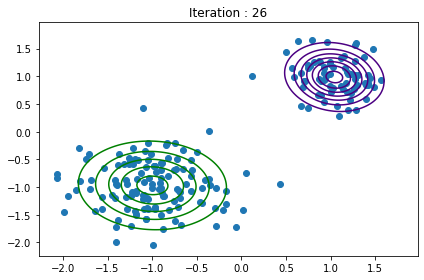

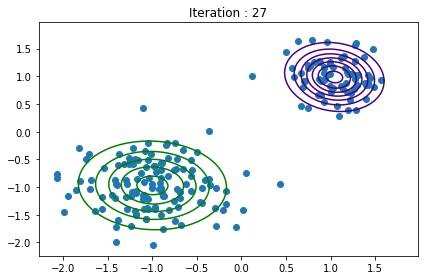

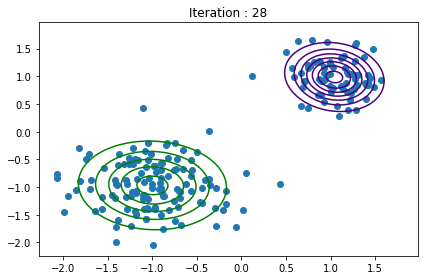

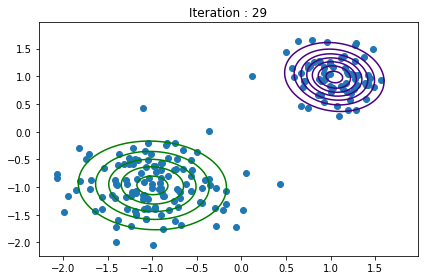

In [96]:
############################################################################
#Illustrate the EM iterations
############################################################################
def plot_contours(data, means, covs, title):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1])

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-2.0, 2, delta)
    y = np.arange(-2.0, 2, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

    col = ['green', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])

    plt.title(title)
    plt.tight_layout()

for i in range(len(thetas)):
  plot_contours(X, thetas[i]["mus"], thetas[i]["covs"], "Iteration : " + str(i))


{'mus': array([[ 0, -2],
       [ 0, -1]]), 'covs': array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]]), 'pi': array([0.5, 0.5])}


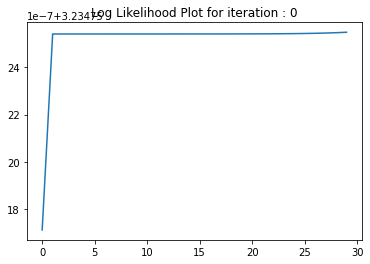

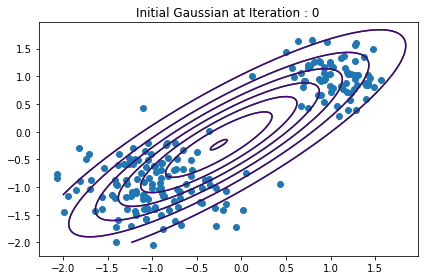

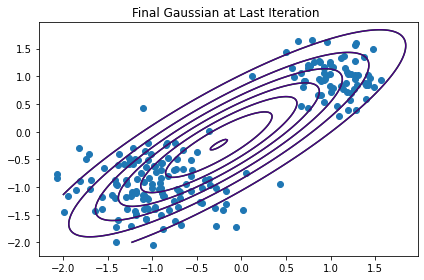

{'mus': array([[ 0, -2],
       [ 0,  0]]), 'covs': array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]]), 'pi': array([0.5, 0.5])}


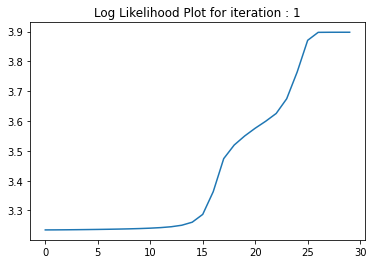

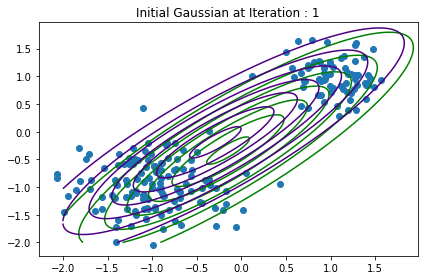

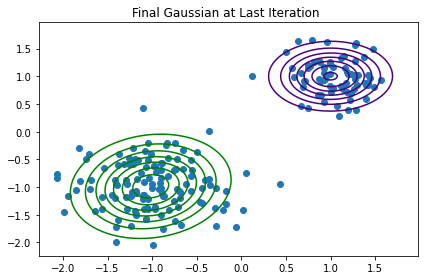

{'mus': array([[ 0, -1],
       [ 0, -1]]), 'covs': array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]]), 'pi': array([0.5, 0.5])}


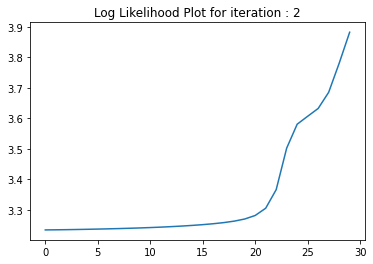

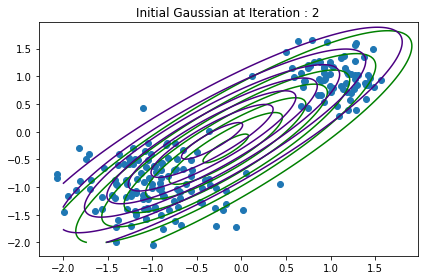

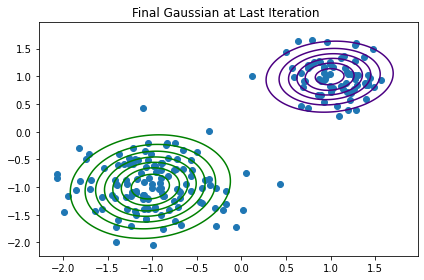

{'mus': array([[ 0, -1],
       [-1, -2]]), 'covs': array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]]), 'pi': array([0.5, 0.5])}


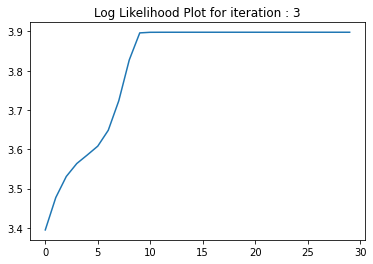

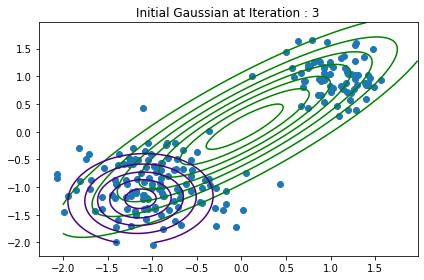

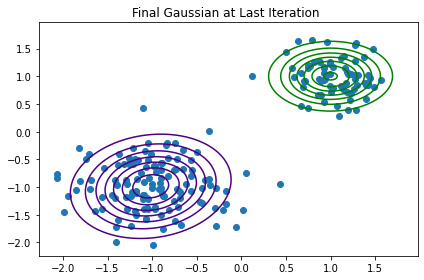

{'mus': array([[ 0, -1],
       [-1,  0]]), 'covs': array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]]), 'pi': array([0.5, 0.5])}


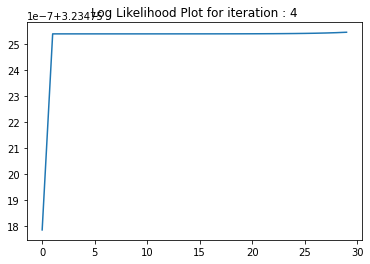

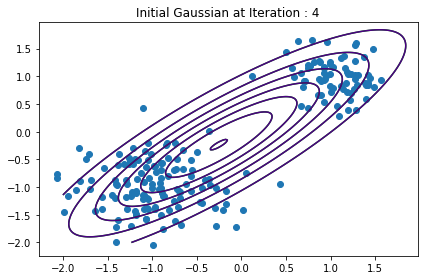

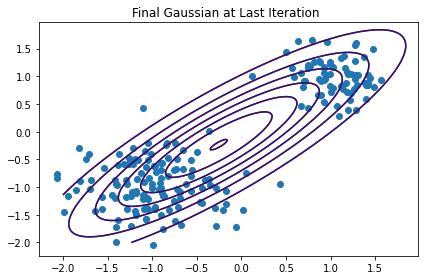

In [118]:
############################################################################
#Understand the issues with EM algorithm
############################################################################

# 2. For different initializations

for i in range(5):
  theta = initialization(X, 2)
  thetas, logLikelihoods = EMalgo(dData["samples"], theta, 30)
  print(theta)
  plt.plot(logLikelihoods)
  plt.title("Log Likelihood Plot for iteration : " + str(i))
  plt.show()
  plot_contours(X, thetas[0]["mus"], thetas[0]["covs"], "Initial Gaussian at Iteration : " + str(i))
  plt.show()
  plot_contours(X, thetas[-1]["mus"], thetas[-1]["covs"], "Final Gaussian at Last Iteration ")
  plt.show()

Text(0.5, 1.0, 'Final Gaussians')

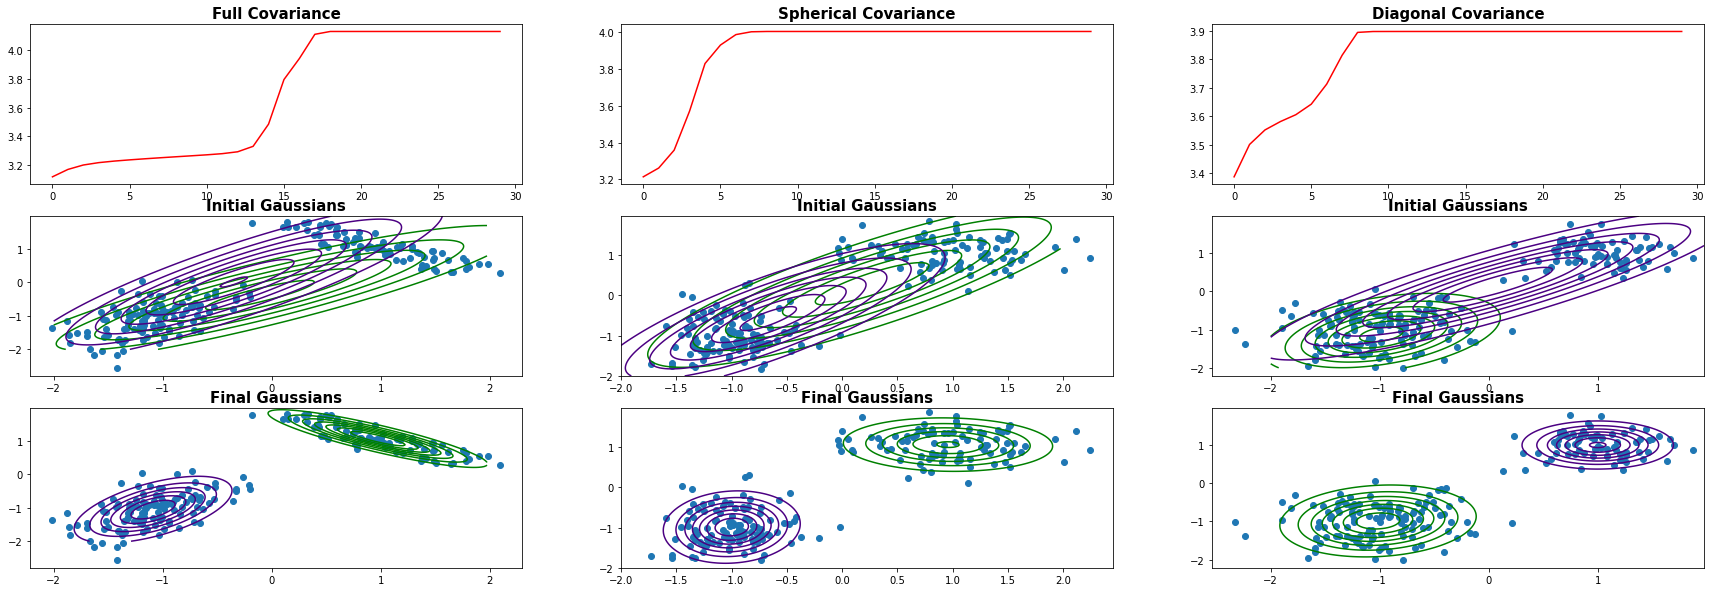

In [122]:
############################################################################
#Understand the issues with EM algorithm
############################################################################

# 2. For different covariances

theta = initialization(X, 2)
fthetas, flogLikelihoods = EMalgo(fData["samples"], theta, 30)
sthetas, slogLikelihoods = EMalgo(sData["samples"], theta, 30)
dthetas, dlogLikelihoods = EMalgo(dData["samples"], theta, 30)

fig, ax = plt.subplots(3,3,figsize=(30,10))
delta = 0.025
x = np.arange(-2.0, 2, delta)
y = np.arange(-2.0, 2, delta)
x_grid, y_grid = np.meshgrid(x, y)
coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T
col = ['green', 'indigo']

# Full Covariance
ax[0][0].plot(flogLikelihoods,"r")
ax[0][0].set_title('Full Covariance',weight = 'bold',fontsize=15)
k = fthetas[0]["mus"].shape[0]
for i in range(k):
  mean = fthetas[0]["mus"][i]
  cov = fthetas[0]["covs"][i]
  z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
  ax[1][0].contour(x_grid, y_grid, z_grid, colors = col[i])
ax[1][0].scatter(fData["samples"][:, 0], fData["samples"][:, 1])
ax[1][0].set_title('Initial Gaussians',weight = 'bold',fontsize=15)
for i in range(k):
  mean = fthetas[-1]["mus"][i]
  cov = fthetas[-1]["covs"][i]
  z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
  ax[2][0].contour(x_grid, y_grid, z_grid, colors = col[i])
ax[2][0].scatter(fData["samples"][:, 0], fData["samples"][:, 1])
ax[2][0].set_title('Final Gaussians',weight = 'bold',fontsize=15)

# Spherical
ax[0][1].plot(slogLikelihoods,"r")
ax[0][1].set_title('Spherical Covariance',weight = 'bold',fontsize=15)
k = sthetas[0]["mus"].shape[0]
for i in range(k):
  mean = sthetas[0]["mus"][i]
  cov = sthetas[0]["covs"][i]
  z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
  ax[1][1].contour(x_grid, y_grid, z_grid, colors = col[i])
ax[1][1].scatter(sData["samples"][:, 0], sData["samples"][:, 1])
ax[1][1].set_title('Initial Gaussians',weight = 'bold',fontsize=15)
for i in range(k):
  mean = sthetas[-1]["mus"][i]
  cov = sthetas[-1]["covs"][i]
  z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
  ax[2][1].contour(x_grid, y_grid, z_grid, colors = col[i])
ax[2][1].scatter(sData["samples"][:, 0], sData["samples"][:, 1])
ax[2][1].set_title('Final Gaussians',weight = 'bold',fontsize=15)

# Diagonal Covariance
ax[0][2].plot(dlogLikelihoods,"r")
ax[0][2].set_title('Diagonal Covariance',weight = 'bold',fontsize=15)
k = dthetas[0]["mus"].shape[0]
for i in range(k):
  mean = dthetas[0]["mus"][i]
  cov = dthetas[0]["covs"][i]
  z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
  ax[1][2].contour(x_grid, y_grid, z_grid, colors = col[i])
ax[1][2].scatter(dData["samples"][:, 0], dData["samples"][:, 1])
ax[1][2].set_title('Initial Gaussians',weight = 'bold',fontsize=15)
for i in range(k):
  mean = dthetas[-1]["mus"][i]
  cov = dthetas[-1]["covs"][i]
  z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
  ax[2][2].contour(x_grid, y_grid, z_grid, colors = col[i])
ax[2][2].scatter(dData["samples"][:, 0], dData["samples"][:, 1])
ax[2][2].set_title('Final Gaussians',weight = 'bold',fontsize=15)

<h4> <b> Report of the assignment : </b>  
Write down your observations on expectation and maximization algorithm

<dt> <h4> 1. From the above plots, we can say EM Algorithm guaranteed to increase log likelihoods but not the global best.</h4> </dt>
<dt> <h4> 2. EM Algorithm has very fast convergence to reach local minimas.</h4> </dt>
<dt> <h4> 3. Plots shows that for all types of covariance matrices, two gaussians sits perfectly over the data generated using bivariate gaussain model. </h4> </dt>
<dt> <h4> 4. With EM Algo, we have successfully captured and modelled latent info which solves the chicken and egg problem with MultiModal Gaussian update equation. </h4> </dt>

## Isssues with EM Algorithm

<dt> <h4> 1. From different initialization plots, we can infer that for plot 1, only 1 gaussian took the whole responsibility while maximizing the likelihood (thus making illusion). Hence poor initializations can lead to overfitting over the data.</h4> </dt>

<dt> <h4> 1. From different covariance plots, gaussians fits well. But for each covariance on higher dimensions, parameters will increase with full covariance matrix to have highest. Full covariance matrix takes advantage of correlatedness, hence it is more likely to fit data well.</h4> </dt>
